In [4]:
import pandas as pd
import numpy as np
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [5]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [6]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [7]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [8]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [9]:
import matplotlib.pyplot as plt

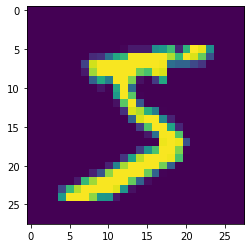

In [10]:
plt.imshow(x_train[0])

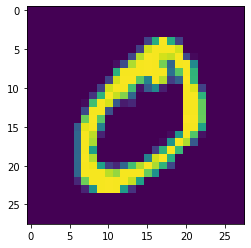

In [11]:
plt.imshow(x_train[1])

In [12]:
x_train[0].max()

255

In [13]:
x_train[0].min()

0

In [14]:
x_train=x_train/255
x_test=x_test/255

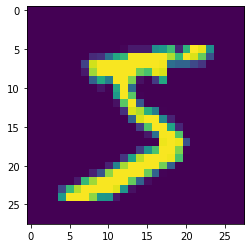

In [15]:
plt.imshow(x_train[0])

In [16]:
x_train[0].max()

1.0

In [17]:
x_train[0].min()

0.0

In [32]:
model=Sequential()

In [33]:
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [34]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 128)               100480    
                                                                 
 dense_6 (Dense)             (None, 32)                4128      
                                                                 
 dense_7 (Dense)             (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics='accuracy')

In [36]:
history=model.fit(x_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2836 - accuracy: 0.9178 - val_loss: 0.1565 - val_accuracy: 0.9533
Epoch 2/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1193 - accuracy: 0.9634 - val_loss: 0.1105 - val_accuracy: 0.9679
Epoch 3/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0812 - accuracy: 0.9754 - val_loss: 0.0940 - val_accuracy: 0.9703
Epoch 4/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0602 - accuracy: 0.9812 - val_loss: 0.0990 - val_accuracy: 0.9708
Epoch 5/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0458 - accuracy: 0.9851 - val_loss: 0.0898 - val_accuracy: 0.9749
Epoch 6/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0368 - accuracy: 0.9885 - val_loss: 0.1061 - val_accuracy: 0.9713
Epoch 7/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0309 - accuracy: 0.9899 - val_loss: 0.0901 - val_accuracy:

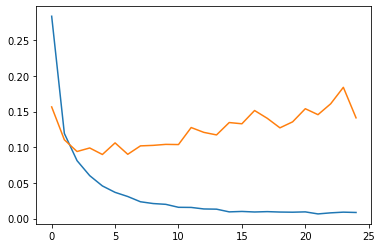

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

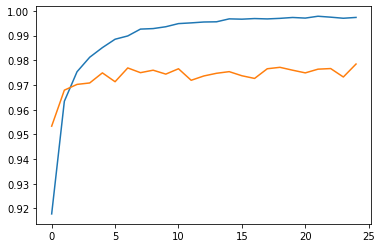

In [38]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [39]:
y_prob=model.predict(x_test)

In [41]:
y_prob.shape

(10000, 10)

In [42]:
x_test.shape

(10000, 28, 28)

In [44]:
y_pred=y_prob.argmax(axis=1)

In [45]:
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [48]:
from sklearn.metrics import accuracy_score

In [49]:
accuracy_score(y_test,y_pred)

0.9773